# Natural Language Processing (NLP)

Email, road signs, Alexsa, foreign languages, kids learning to speak and read, newspapers, internet, books...language is everywhere! 


### NLP performed on text collections (corpora):
* Tweets
* Facebook posts
* Conversations
* Movie reviews
* Product reviews
* Shakespeare plays
* Historic documents
* News reports
* Meeting minutes

> Natural language lacks mathematical precision.  Language is nuanced and difficult to understand sometimes.  Language shapes thought - Vygotsky (2012)

---

### Exercise:
Think of 2 text "blobs" that you could "process" (for information).
<!-- Search engines can get to "know you" -->
---

# TextBlob Library in Python

__TextBlob__ is an object-oriented NLP __text-processing__ library that is built on __NLTK__ and __pattern__ NLP libraries and simplifies many of their capabilities.  **TextBlob can perform**:

* Tokenization - splitting text into pieces called tokens, such as words
* Parts-of-speech (POS) tagging - identify nouns, verbs, adjectives, etc.
* Noun phrase extraction - groups of words that are nouns, e.g., "red brick factory"
* Sentiment analysis - determine whether text has positive, neutral, or negative sentiment.
* Language detection and translation
* Spell checking, grammar, and correction (e.g., Grammarly)
* Inflection - singular and plural
* Stemming - reducing words to their stems by removing prefixes, suffixes.  
* Lemmatization
* Word frequencies from a corpus or corpora
* WordNet integration for definitions, synonyms, antonyms
* Stop word elimination - remove common words such as: a, an, the, I, we, you, etc.
* n-grams - consecutive words in a corpus for frequently appearing words next to each other.

#### Overview

1. `TextBlob` is a fundamental class for NLP within the `textblob` module.
2. `TextBlob` supports string methods and can be used to compare strings.

### Install TextBlob and NLTK

If "offline", install at the command prompt:

`conda install -c conda-forge textblob`

If you are not using Anaconda, then you might need to use the following commands.

`pip install textblob`

`python -m textblob.download_corpora`

`pip install textblob.download_corpora`

With Colab, we do not need to worry about installing packages.

In [ ]:
from textblob import TextBlob
# import textblob 
# textblob is library (module)
# TextBlob is a class in textblob library

import nltk
from nltk.corpus import stopwords


# Download the following corpora
nltk.download('punkt')                      # Tokenization
nltk.download('averaged_perceptron_tagger') # Parts-of-Speech tagging
nltk.download('brown')                      # Parts-of-Speech tagging (Brown University)
nltk.download('wordnet')
nltk.download('movie_reviews') # <-- Needed: classifier based on movie reviews

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

### Create a TextBlob

In [ ]:
# from textblob import TextBlob  # <-- if NOT already imported

text = 'Today is a beautiful day. Tomorrow look like bad weather'
blob = TextBlob(text)

In [ ]:
# blob is the sentence contained in 'text' converted into a TextBlob. Let's see:
blob

TextBlob("Today is a beautiful day. Tomorrow look like bad weather")

### Tokenizing Text into Sentences and Words
NLP often requires tokenizing text _before_ perfoming tasks.  Recall, **tokenizing** is splitting a blob into parts (e.g., words or sentences).

`TextBlob` provides easy access to sentences and words.  

In [ ]:
# Sentences property  - Tokenizing by sentence
blob.sentences

[Sentence("Today is a beautiful day."),
 Sentence("Tomorrow look like bad weather")]

In [ ]:
# Words property - Tokenizing by words
blob.words

WordList(['Today', 'is', 'a', 'beautiful', 'day', 'Tomorrow', 'look', 'like', 'bad', 'weather'])

---
## Exercise
Create a TextBlob with two sentences, then tokenize it into sentences and words, displaying all the tokens.

---
<!--
x = TextBlob('We had a big storm yesterday.  The winds were really high.')
w = x.words
s = x.sentences
-->

In [ ]:
x = TextBlob('Turn off any wireless microphones.  Then leave the room.')
print(x.sentences)
print(x.words)

[Sentence("Turn off any wireless microphones."), Sentence("Then leave the room.")]
['Turn', 'off', 'any', 'wireless', 'microphones', 'Then', 'leave', 'the', 'room']


### Parts-of-Speech (POS) Tagging
Process of evaluating words based on their context to determine each word's part of speech.  There are eight primary POS:

1. nouns (NN)
2. verbs (VBZ)
3. pronouns (PRP = possessive pronoun, e.g., my)
4. adjectives (JJ)
5. adverbs (RB)
6. prepositions (IN)
7. conjunctions (IN)
8. interjections e.g., "Yes!"

In [ ]:
# Parts-of-Speech (POS) Tagging
blob.tags


[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'JJ'),
 ('look', 'NN'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

In [ ]:
x = TextBlob('Johnnie come lately.')
x.tags

[('Johnnie', 'NNP'), ('come', 'VBP'), ('lately', 'RB')]

### Extract Noun Phrases

Phrase that can function as the **subject** or object of a verb.

In [ ]:
blob.noun_phrases

WordList(['beautiful day', 'tomorrow', 'bad weather'])

## Pluralization and Singularization

In [ ]:
from textblob import Word

x = Word('index')
x.pluralize()

'indices'

In [ ]:
y = Word('datum')
y.pluralize()

'data'

In [ ]:
y = Word('cacti')
y.singularize()

'cactus'

In [ ]:
# from textblob import TextBlob
animals = TextBlob('dog cat fish alligator deer moose').words
animals.pluralize()

WordList(['dogs', 'cats', 'fish', 'alligators', 'deer', 'moose'])

---

### Exercise 

Singularize 'children' and pluralize 'focus'.

---

## Spell Check


Functions:
* `spellcheck()` - gives suggestions with confidence level
* `correct()` - gives suggestion with highest confidence

> Calling `correct()` on a sentence corrects all words in sentence.

In [ ]:
from textblob import Word

%precision 2
x = Word('theyr')
x.spellcheck()

[('they', 0.57), ('their', 0.43)]

In [ ]:
# correct the word with highest confidence 
x.correct()

'they'

In [ ]:
# Correct an entire sentence
s = TextBlob('Hear is a sentense wit wrds.')
s.correct()

TextBlob("Dear is a sentence wit words.")

In [ ]:
# x = s.sentences.spellcheck()

AttributeError: ignored

## Stemming and Lemmatization

Normalization operations to prepare for analysis.  

In [ ]:
# Word Stems
x = Word('varieties')
x.stem()

'varieti'

In [ ]:
# Lemmatize
x.lemmatize()

'variety'

---
### Exercise

Stem and lemmatize 'strawberries'.

---

### Definitions, synonyms, and antonyms from WordNet

In [ ]:
from textblob import Word

In [ ]:
calculus = Word('calculus')

In [ ]:
calculus.definitions

['a hard lump produced by the concretion of mineral salts; found in hollow organs or ducts of the body',
 'an incrustation that forms on the teeth and gums',
 'the branch of mathematics that is concerned with limits and with the differentiation and integration of functions']

In [ ]:
calculus.synsets

[Synset('calculus.n.01'), Synset('tartar.n.04'), Synset('calculus.n.03')]

In [ ]:
party = Word('party')
party.synsets

[Synset('party.n.01'),
 Synset('party.n.02'),
 Synset('party.n.03'),
 Synset('party.n.04'),
 Synset('party.n.05'),
 Synset('party.v.01')]

In [ ]:
party.definitions

['an organization to gain political power',
 'a group of people gathered together for pleasure',
 'a band of people associated temporarily in some activity',
 'an occasion on which people can assemble for social interaction and entertainment',
 'a person involved in legal proceedings',
 'have or participate in a party']

## n-grams
A sequence of n letters or words.


In [ ]:
blob = TextBlob("The book is on the shelf.  Please bring it to me.")

In [ ]:
blob.ngrams(n=4)

[WordList(['The', 'book', 'is', 'on']),
 WordList(['book', 'is', 'on', 'the']),
 WordList(['is', 'on', 'the', 'shelf']),
 WordList(['on', 'the', 'shelf', 'Please']),
 WordList(['the', 'shelf', 'Please', 'bring']),
 WordList(['shelf', 'Please', 'bring', 'it']),
 WordList(['Please', 'bring', 'it', 'to']),
 WordList(['bring', 'it', 'to', 'me'])]

## Word Counts

Dectecting similarity between documents often uses word counts.  `TextBlob` automatically counts words.  

# Sentiment Analysis
Common and valuable task that determines whether a text is positive, neutral, or negative.  Companies could use this to determine if customers are speaking positively about their products.  

Here are some sentences to analyze:
* The food is not good.
* The movie was not bad.
* The move was great!

In [ ]:
# Recall the blob
blob

TextBlob("Today is a beautiful day. Tomorrow look like bad weather")

In [ ]:
# Sentiment Analysis 
%precision 3
blob.sentiment                    # sentiment of entire blob


Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)

* Polarity ranges from -1 (bad) to 1 (good)
* Subjectivity ranges from 0 (fact) to 1 (opinion)

In [ ]:
blob.sentiment.polarity

0.07500000000000007

In [ ]:
blob.sentiment.subjectivity

0.8333333333333333

In [ ]:
# Magic 
%precision 3
blob.sentiment.subjectivity

0.833

In [ ]:
# Sentiment for individual sentences
for sentence in blob.sentences:
  print(sentence.sentiment)

Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


> Note: first sentences is positive, but pure opinion. Second sentence is negative also opinionated.  Therefore, overall sentiment of the blob was neutral (close to zero).

---
### Exercises

Recall, *polarity* is positive (1), negative (-1), or neutral (0).  Subjectivity is a value between 0 (objective) and 1 (subjective).

1. Make a sentence with subjectivity close to 1.
2. Make a sentence with subjectivity close to 0.
3. Make a sentence with polarity close to 1.
4. Make a sentence with polarity close to -1.
5. Make a sentence with polarity close to 0.  
6. Make an objectively negative sentence.  

---


In [ ]:
x = TextBlob('The area of a circle is pi r square.')
x.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

### Exercise
How bias are news sources?  Are some more bias than others?  The answer to this second questions is most likely yes.  But which ones are most bias? By how much?


In [ ]:
# Lets get a newspaper article
# https://lite.cnn.com/en
newspaper = "news.txt"

'''
Notes: 
1. Copy article from source (plain text). 
2. Create a text (.txt) file and save in sample_data (see ...)
3. Paste and save.
4. Import path library and read article
'''

'\nNotes: \n1. Copy article from source (plain text). \n2. Create a text (.txt) file and save in sample_data (see ...)\n3. Paste and save.\n4. Import path library and read article\n'

In [ ]:
from pathlib import Path

In [ ]:
article = Path('sample_data/news.txt').read_text()
news = TextBlob(article)
news.sentiment

Sentiment(polarity=0.07708354845969524, subjectivity=0.41959754822140133)

In [ ]:
for sentence in news.sentences:
  print(sentence.sentiment)

Sentiment(polarity=0.2, subjectivity=0.5)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.16, subjectivity=0.5399999999999999)
Sentiment(polarity=-0.025, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=-0.05000000000000001, subjectivity=0.3833333333333333)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.375)
Sentiment(polarity=-0.15, subjectivity=0.39166666666666666)
Sentiment(polarity=0.0, subjectivity=0.7972222222222222)
Sentiment(polarity=0.21875, subjectivity=0.61875)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.05)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.06, subjectivity=0.5)
Sentiment(polarity=0.05, subjectivity=0.25)
Sentiment(polarity=-0.1119047619047619, subjectivity=0.4761904761904762)
Sen

In [ ]:
news.sentences[5]

Sentence("The US Centers for Disease Control and Prevention, too, has not changed its guidance, and continues to recommend mask-wearing in schools, regardless of vaccination status.")

## Sentiment Analysis with NaiveBayesAnalyzer

`TextBlob` uses `PatternAnalyzer` from the `pattern` library.  

`TextBlob` also comes with `NaiveBayeAnalyzer` which was trained on a database of movie reivews.  Naive Bayes is a commonly used in text classification algorithms in machine learning.  

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

article = Path('sample_data/' + newspaper).read_text()
news = TextBlob(article, analyzer = NaiveBayesAnalyzer())

%precision 2
news.sentiment   

Sentiment(classification='pos', p_pos=1.0, p_neg=1.1718557467472417e-24)

In [ ]:
print(news)

In some liberal states, masks are coming off -- but not everyone is ready.

Governors in New Jersey, California, Delaware, Connecticut and Oregon have all said that they are lifting masking requirements in some indoor settings. All but California have set deadlines to end required masking in schools. The governors pointed to Covid-19 case rates that have fallen precipitously after Omicron's peak, the hospitalization rates that have stabilized or high vaccination rates in their states.

But the Biden administration still recommends masking indoors -- a position that has long put it in conflict with some Republican-led states, and now with several Democrat-led ones. 
The US Centers for Disease Control and Prevention, too, has not changed its guidance, and continues to recommend mask-wearing in schools, regardless of vaccination status.

This divide reflects politics as much as public health realities. But part of the problem is that there has been no clear path laid out by the CDC for wh

In [ ]:
# from textblob.sentiments import NaiveBayesAnalyzer
blob2 = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob2

TextBlob("Today is a beautiful day. Tomorrow look like bad weather")

In [ ]:
# nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
blob2.sentiment

Sentiment(classification='pos', p_pos=0.5771383279799119, p_neg=0.42286167202008884)

## Webscraping
> Note: There are ethical and legal issues here.  Please read terms of service.  Only used for educational purposes here.



In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = urlopen("https://en.wikipedia.org/wiki/Tom_Brady")
soup = BeautifulSoup(url, 'html.parser')

# getting all the paragraphs
for para in soup.find_all("p"):
    print(para.get_text())


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = urlopen("https://lite.cnn.com/en/article/h_fb695edfd4abe54f903ba07c8865dde8")
soup2 = BeautifulSoup(url, 'html.parser')

# getting all the paragraphs
for para in soup2.find_all("p"):
    print(para.get_text())

# Word Frequencies

### Data Sources

* Project Gutenberg
  - https://www.gutenberg.org/ebooks
  - Romeo and Juliet is ebooks/1513

In [ ]:
# from pathlib import Path
# from textblob import TextBlob

# read the book
book = TextBlob(Path('sample_data/book.txt').read_text())

### Remove stopwords

In [ ]:
# Get all the words (and their frequency) in a tuple, i.e., ('word', count) 
words = book.word_counts.items()
words

dict_items([('chapter', 63), ('i', 6595), ('my', 2063), ('father', 69), ('’', 2596), ('s', 1171), ('family', 39), ('name', 120), ('being', 261), ('pirrip', 5), ('and', 6957), ('christian', 9), ('philip', 7), ('infant', 6), ('tongue', 8), ('could', 481), ('make', 158), ('of', 4422), ('both', 133), ('names', 13), ('nothing', 175), ('longer', 19), ('or', 548), ('more', 396), ('explicit', 1), ('than', 293), ('pip', 339), ('so', 787), ('called', 62), ('myself', 236), ('came', 235), ('to', 5054), ('be', 1031), ('give', 87), ('as', 1746), ('on', 1410), ('the', 8121), ('authority', 8), ('his', 1854), ('tombstone', 7), ('sister', 169), ('—mrs', 2), ('joe', 743), ('gargery', 37), ('who', 333), ('married', 27), ('blacksmith', 31), ('never', 311), ('saw', 250), ('mother', 43), ('any', 267), ('likeness', 8), ('either', 38), ('them', 367), ('for', 1357), ('their', 175), ('days', 59), ('were', 791), ('long', 169), ('before', 307), ('photographs', 1), ('first', 194), ('fancies', 4), ('regarding', 8), 

In [ ]:
# Remove stopwords (and, the, a, of, etc.) <-- lots of these words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Create list with stopwords removed
words = [x for x in words if x[0] not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Sort by frequency

In [ ]:
from operator import itemgetter

sorted_words = sorted(words, key = itemgetter(1), reverse = True)

In [ ]:
sorted_words[-0:10]

[('“', 3945),
 ('”', 3908),
 ('’', 2596),
 ('said', 1348),
 ('joe', 743),
 ('mr', 710),
 ('would', 595),
 ('one', 500),
 ('could', 481),
 ('know', 388)]

In [ ]:
top20 = sorted_words[3:24]
top20

[('said', 1348),
 ('joe', 743),
 ('mr', 710),
 ('would', 595),
 ('one', 500),
 ('could', 481),
 ('know', 388),
 ('miss', 382),
 ('come', 373),
 ('little', 371),
 ('upon', 365),
 ('time', 361),
 ('pip', 339),
 ('looked', 324),
 ('havisham', 316),
 ('man', 314),
 ('herbert', 313),
 ('never', 311),
 ('much', 309),
 ('like', 308),
 ('old', 300)]

In [ ]:
# Use pandas to make a nice data frame
import pandas as pd

df = pd.DataFrame(top20, columns = ['word', 'count'])
df

,word,count
0,said,1348
1,joe,743
2,mr,710
3,would,595
4,one,500
5,could,481
6,know,388
7,miss,382
8,come,373
9,little,371


## Visualize

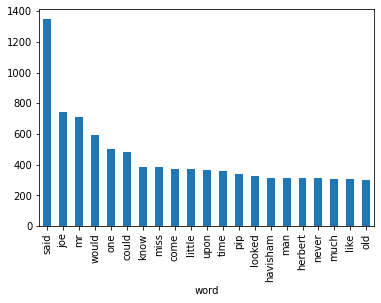

In [ ]:
plot = df.plot.bar(x = 'word',y = 'count', legend = False)

#### Word Cloud
Can't get to work on Google.  Try Anaconda.

In [ ]:
#import imageio as iio

# !pip install visvis
#import visvis as vv

#im = iio.imread('http://upload.wikimedia.org/wikipedia/commons/d/de/Wikipedia_Logo_1.0.png')
#vv.imshow(im)




In [ ]:
# wordcloud = WordCloud(colormap = 'prism', mask = mask_image, background_color='white')

from wordcloud import WordCloud
wordcloud = WordCloud.generate(top20)

TypeError: ignored

## Readability (Textastic)

In [ ]:
# !pip install textatistic

In [ ]:
from textatistic import Textatistic

In [ ]:
book = Path('sample_data/book.txt').read_text()

In [ ]:
readability  = Textatistic(book)
readability.dict()
# NOT Dale-Chall list of words undertood by 80% of 5th graders
# Polysylabic word count (# words with 3+ syllables)
# Flesch scor: >90 = 5th grade.  <30 college degree needed.  
# SMOG = Gobblygok = years of education required to read.  
# Dale-Chall grade level

{'char_count': 805114,
 'dalechall_score': 7.18,
 'flesch_score': 85.35,
 'fleschkincaid_score': 5.66,
 'gunningfog_score': 8.62,
 'notdalechall_count': 31720,
 'polysyblword_count': 7890,
 'sent_count': 10782,
 'smog_score': 8.02,
 'sybl_count': 229263,
 'word_count': 186649}

In [ ]:
# Sentence length (words per sentence)
readability.word_count / readability.sent_count

# Other metrics
# char_count
# sybl_count

17.31

### Exercise
1. Compute average characters per word.
2. Copmute average syllables per word.

In [ ]:
readability.sybl_count / readability.word_count

1.23

## Language Detection and Translation

* Use `detect_language` method

In [ ]:
book.detect_language()

AttributeError: ignored

In [ ]:
# Translate
blob = TextBlob("Comment vas-tu?")
# "http://translate.google.com/translate_a/t?client=te&format=html&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&dt=at&ie=UTF-8&oe=UTF-8&otf=2&ssel=0&tsel=0&kc=1"

 
# print(blob.detect_language())
#print(blob.translate(to='es'))
print(blob.translate(to='en'))
# print(blob.translate(to='zh'))

How are you?


In [ ]:
blob.translate(to='zh')

TextBlob("你好吗？")

In [ ]:
from textblob import TextBlob
en_blob = TextBlob('He is one of the world’s leading certification training providers.')

en_blob.translate(to='es')  

TextBlob("Es uno de los proveedores de capacitación de certificación líderes del mundo.")

In [ ]:
from textblob import TextBlob

blob = TextBlob("Buongiorno!")
# print(blob.detect_language())
print(blob.translate(to='en'))

HTTPError: ignored

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

# Note: If browser is on secure mode, (e.g., block third party cookies), 
# errors will occur.  
# See https://stackoverflow.com/questions/48420759/upload-local-files-using-google-colab 

TypeError: ignored

In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['baseball.csv']))

In [ ]:
df2

,id,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
96,89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
97,89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,3,3,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
98,89533,aloumo01,2007,1,NYN,NL,87,328,51,112,19,1,13,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0


In [ ]:
import pandas as pd

# url = 'raw_github_link'
# df = pd.read_csv(url)# Store in Pandas Dataframe

# Testing Ideas

In [ ]:
wordlist = Path('sample_data/afinn.txt').read_text()


In [ ]:
with open('sample_data/afinn.txt') as f:
    lines = f.readlines()

In [ ]:
import csv
wordscore = {}
with open('sample_data/afinn.txt', 'r') as f:
    reader = csv.reader(f, dialect='excel', delimiter='\t')
    for row in reader:
        wordscore[row[0]] = int(row[1])
        #print(row)
    print(wordscore)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2}


In [ ]:
# given a blob

score = 0
for x in blob.words:
  for k,v in wordscore.items():
    if x == k:
      score += v
      break
      

# References

Vygotsky, L. S. (2012). Thought and language. MIT press.

<!-- 

@book{vygotsky2012thought,
  title={Thought and language},
  author={Vygotsky, Lev S},
  year={2012},
  publisher={MIT press}
}


-->